## import 导入模块

In [1]:
%matplotlib notebook
import numpy as np
import operator
import matplotlib.pyplot as plt


## 生成数据函数

In [3]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [4]:
group, labels = createDataSet()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

<IPython.core.display.Javascript object>


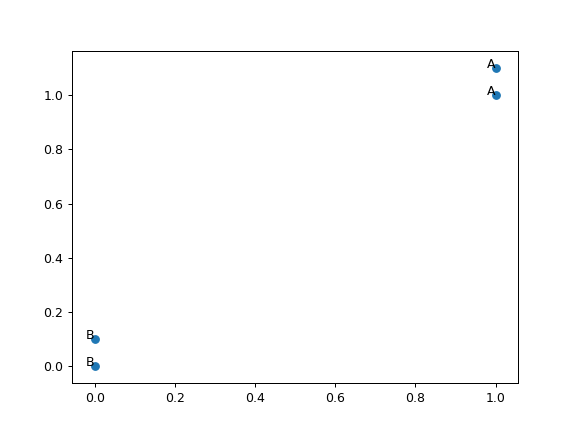

In [19]:
plt.scatter(group[:,0],group[:,1])

In [20]:
for i in range(4):
    plt.text(group[i][0],group[i][1], labels[i], horizontalalignment='right')

## k近邻算法伪代码
1. 计算已知类别数据集中的点与当前之间的距离

2. 按照距离递增次序排序

3. 选取与当前点距离最小的k个点

4. 确定前k个点所在的类别的出现频率

5. 返回前k个点出现频率最高的类别作为当前点的预测分类

In [30]:
def classify0(inx, dataSet, lables,k):
    dataSetSize = dataSet.shape[0]
    # 距离计算
    diffMat = np.tile(inx, (dataSetSize,1))-dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    # 选择距离最小的k个点
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0)+1
    # 排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [27]:
print(np.tile([1,2],(4,1)).shape)
print(group.sum(axis=1))
dist = group.sum(axis=1)
dist.argsort()

(4, 2)
[2.1 2.  0.  0.1]


array([2, 3, 1, 0], dtype=int64)

In [31]:
classify0([0,0], group, labels,3)

'B'

In [32]:
classCount={'A':2,'B':4}
sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

[('B', 4), ('A', 2)]

In [34]:
classCount.items()

dict_items([('A', 2), ('B', 4)])

## sorted函数
```
>>> sorted({1: 'D', 2: 'B', 3: 'B', 4: 'E', 5: 'A'})
[1, 2, 3, 4, 5]
```
```
>>> sorted("This is a test string from Andrew".split(), key=str.lower)
['a', 'Andrew', 'from', 'is', 'string', 'test', 'This']
```
```
>>> student_tuples = [
        ('john', 'A', 15),
        ('jane', 'B', 12),
        ('dave', 'B', 10),
]
>>> sorted(student_tuples, key=lambda student: student[2])   # sort by age
[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]
```
```
>>> class Student:
        def __init__(self, name, grade, age):
                self.name = name
                self.grade = grade
                self.age = age
        def __repr__(self):
                return repr((self.name, self.grade, self.age))
        def weighted_grade(self):
                return 'CBA'.index(self.grade) / float(self.age)

>>> student_objects = [
        Student('john', 'A', 15),
        Student('jane', 'B', 12),
        Student('dave', 'B', 10),
]
>>> sorted(student_objects, key=lambda student: student.age)   # sort by age
[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]
```
```
>>> from operator import itemgetter, attrgetter, methodcaller

>>> sorted(student_tuples, key=itemgetter(2))
[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]

>>> sorted(student_objects, key=attrgetter('age'))
[('dave', 'B', 10), ('jane', 'B', 12), ('john', 'A', 15)]
```
```
>>> sorted(student_tuples, key=itemgetter(1,2))
[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]

>>> sorted(student_objects, key=attrgetter('grade', 'age'))
[('john', 'A', 15), ('dave', 'B', 10), ('jane', 'B', 12)]
```

## 从文本解析数据

In [36]:
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    # 得到文件数
    returnMat = np.zeros((numberOfLines,3))
    # 返回创建的numpy矩阵
    classLabelVector = []
    index = 0
    # 解析文件数据到列表
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [39]:
datingDataMat, datingLabels = file2matrix('../dataSet/Ch02/datingTestSet2.txt')

In [40]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [41]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

#